In [7]:
#import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
#read data
train_data = pd.read_csv("train.csv")

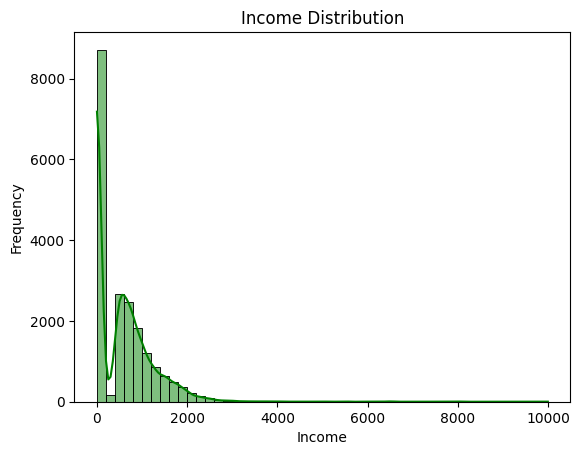

In [9]:
# "income" 열의 분포를 히스토그램으로 시각화 (Seaborn 최신 버전에서는 histplot 사용 권장)
sns.histplot(train_data['Income'], bins=50, color='green', kde=True)
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

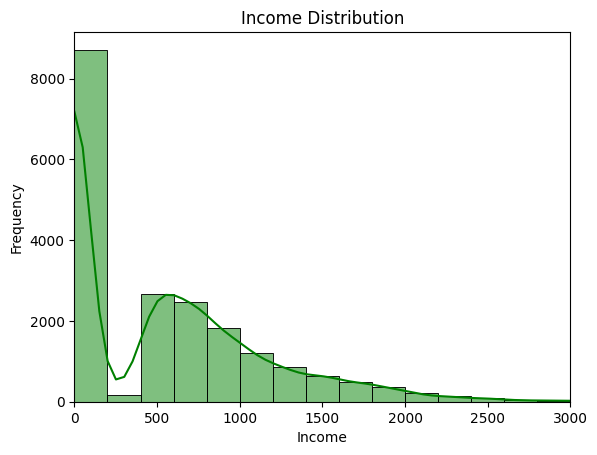

In [10]:
sns.histplot(train_data['Income'], bins=50, color='green', kde=True)
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.xlim(0, 3000)  # x축 범위 설정
plt.show()

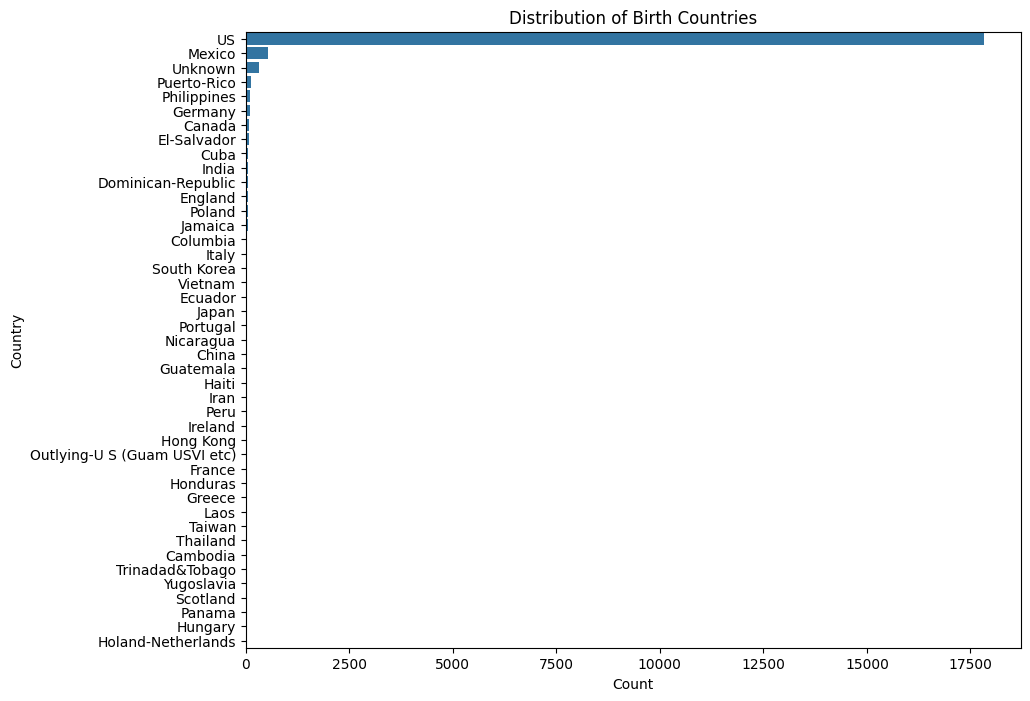

In [11]:
# Birth_Country 열의 분포를 시각화
plt.figure(figsize=(10, 8))
sns.countplot(y='Birth_Country', data=train_data, order = train_data['Birth_Country'].value_counts().index)
plt.title('Distribution of Birth Countries')
plt.xlabel('Count')
plt.ylabel('Country')
plt.show()
